In [17]:
%load_ext uhed

The uhed extension is already loaded. To reload it, use:
  %reload_ext uhed


In [18]:
SITE = VTSAM.Illinois
SLICE = "gautamrams"

In [19]:
%slice gautamrams

In [20]:
%site vts-illinois

In [21]:
SITE.deletesliver(context,SLICE)

In [22]:
%lab

<IPython.core.display.Javascript object>

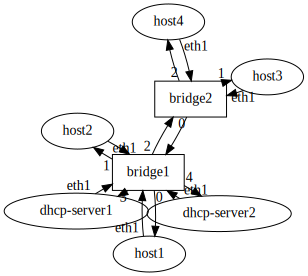

In [23]:
genish.showtopo(manifest,"neato")

In [8]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server1']

Hostname,IP Address,MAC Address,State,End


In [9]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server2']

Hostname,IP Address,MAC Address,State,End


# Part 1

### “ip addr” and “ip route show" before dhclient

gramasam@cot-cn:~$ gssh gautamrams host1
/ # ifconfig
eth1      Link encap:Ethernet  HWaddr CA:26:F3:5B:F5:FB
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:76 errors:0 dropped:0 overruns:0 frame:0
          TX packets:0 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000
          RX bytes:4184 (4.0 KiB)  TX bytes:0 (0.0 B)

lo        Link encap:Local Loopback
          inet addr:127.0.0.1  Mask:255.0.0.0
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:0 errors:0 dropped:0 overruns:0 frame:0
          TX packets:0 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1
          RX bytes:0 (0.0 B)  TX bytes:0 (0.0 B)

/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
/ #

### dhclient and the tcpdump results at host1 showing DHCP messages.

/ # dhclient -v eth1
Internet Systems Consortium DHCP Client 4.3.4
Copyright 2004-2016 Internet Systems Consortium.
All rights reserved.
For info, please visit https://www.isc.org/software/dhcp/

Listening on LPF/eth1/ca:26:f3:5b:f5:fb
Sending on   LPF/eth1/ca:26:f3:5b:f5:fb
Sending on   Socket/fallback
DHCPDISCOVER on eth1 to 255.255.255.255 port 67 interval 6
DHCPREQUEST on eth1 to 255.255.255.255 port 67
DHCPOFFER from 10.0.0.1
DHCPACK from 10.0.0.1
bound to 10.0.0.10 -- renewal in 392 seconds.
/ #

gramasam@cot-cn:~$ gssh gautamrams host1
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
01:51:26.568151 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype IPv4 (0x0800), length 342: 0.0.0.0.68 > 255.255.255.255.67: BOOTP/DHCP, R
equest from ca:26:f3:5b:f5:fb (oui Unknown), length 300
01:51:26.568806 72:6b:ae:a1:40:e1 (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.10 tell 10.0.0.1, length
28
01:51:27.567387 72:6b:ae:a1:40:e1 (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.10 tell 10.0.0.1, length
28
01:51:27.570076 72:6b:ae:a1:40:e1 (oui Unknown) > ca:26:f3:5b:f5:fb (oui Unknown), ethertype IPv4 (0x0800), length 342: 10.0.0.1.67 > 10.0.0.10.
68: BOOTP/DHCP, Reply, length 300
01:51:27.570285 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype IPv4 (0x0800), length 342: 0.0.0.0.68 > 255.255.255.255.67: BOOTP/DHCP, R
equest from ca:26:f3:5b:f5:fb (oui Unknown), length 300
01:51:27.610686 72:6b:ae:a1:40:e1 (oui Unknown) > ca:26:f3:5b:f5:fb (oui Unknown), ethertype IPv4 (0x0800), length 342: 10.0.0.1.67 > 10.0.0.10.
68: BOOTP/DHCP, Reply, length 300
01:51:28.567503 72:6b:ae:a1:40:e1 (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.10 tell 10.0.0.1, length
28
01:51:39.078138 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
01:51:49.086174 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
01:51:50.083349 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
01:51:51.083348 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
^C
11 packets captured
27 packets received by filter
16 packets dropped by kernel
/ #

### “ip addr” and “ip route show" after dhclient

/ # ifconfig
eth1      Link encap:Ethernet  HWaddr CA:26:F3:5B:F5:FB
          inet addr:10.0.0.10  Bcast:10.0.0.255  Mask:255.255.255.0
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:300 errors:0 dropped:0 overruns:0 frame:0
          TX packets:22 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000
          RX bytes:16662 (16.2 KiB)  TX bytes:1844 (1.8 KiB)

lo        Link encap:Local Loopback
          inet addr:127.0.0.1  Mask:255.0.0.0
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:9 errors:0 dropped:0 overruns:0 frame:0
          TX packets:9 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1
          RX bytes:866 (866.0 B)  TX bytes:866 (866.0 B)

/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.0.0.254      0.0.0.0         UG    0      0        0 eth1
10.0.0.0        0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #

In [10]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server1']

Hostname,IP Address,MAC Address,State,End
host1,10.0.0.10,ca:26:f3:5b:f5:fb,active,2017-10-12 02:12:59


In [11]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server2']

Hostname,IP Address,MAC Address,State,End


In [12]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server1']

Hostname,IP Address,MAC Address,State,End
host3,10.0.0.11,5a:65:06:18:b0:5b,active,2017-10-12 02:15:48
host1,10.0.0.10,ca:26:f3:5b:f5:fb,active,2017-10-12 02:12:59


In [13]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server2']

Hostname,IP Address,MAC Address,State,End
host4,10.0.1.11,82:ce:27:78:a4:c9,active,2017-10-12 02:16:00
host2,10.0.1.10,fa:96:ab:62:90:77,active,2017-10-12 02:15:40


### What is the IP address that got assigned to your host?

The IP Address assigned to my host1 is 10.0.0.10. 

/ # ifconfig
eth1      Link encap:Ethernet  HWaddr CA:26:F3:5B:F5:FB
          inet addr:10.0.0.10  Bcast:10.0.0.255  Mask:255.255.255.0
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:300 errors:0 dropped:0 overruns:0 frame:0
          TX packets:22 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000
          RX bytes:16662 (16.2 KiB)  TX bytes:1844 (1.8 KiB)

lo        Link encap:Local Loopback
          inet addr:127.0.0.1  Mask:255.0.0.0
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:9 errors:0 dropped:0 overruns:0 frame:0
          TX packets:9 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1
          RX bytes:866 (866.0 B)  TX bytes:866 (866.0 B)

/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         10.0.0.254      0.0.0.0         UG    0      0        0 eth1
10.0.0.0        0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #


### What is the IP address of the dhcp server that sent the DHCP replies ?

The IP address of DHCP server is 10.0.0.1.67.

gramasam@cot-cn:~$ gssh gautamrams host1
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
01:51:26.568151 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype IPv4 (0x0800), length 342: 0.0.0.0.68 > 255.255.255.255.67: BOOTP/DHCP, R
equest from ca:26:f3:5b:f5:fb (oui Unknown), length 300
01:51:26.568806 72:6b:ae:a1:40:e1 (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.10 tell 10.0.0.1, length
28
01:51:27.567387 72:6b:ae:a1:40:e1 (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.10 tell 10.0.0.1, length
28
01:51:27.570076 72:6b:ae:a1:40:e1 (oui Unknown) > ca:26:f3:5b:f5:fb (oui Unknown), ethertype IPv4 (0x0800), length 342: 10.0.0.1.67 > 10.0.0.10.
68: BOOTP/DHCP, Reply, length 300
01:51:27.570285 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype IPv4 (0x0800), length 342: 0.0.0.0.68 > 255.255.255.255.67: BOOTP/DHCP, R
equest from ca:26:f3:5b:f5:fb (oui Unknown), length 300
01:51:27.610686 72:6b:ae:a1:40:e1 (oui Unknown) > ca:26:f3:5b:f5:fb (oui Unknown), ethertype IPv4 (0x0800), length 342: 10.0.0.1.67 > 10.0.0.10.
68: BOOTP/DHCP, Reply, length 300
01:51:28.567503 72:6b:ae:a1:40:e1 (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.10 tell 10.0.0.1, length
28
01:51:39.078138 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
01:51:49.086174 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
01:51:50.083349 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
01:51:51.083348 ca:26:f3:5b:f5:fb (oui Unknown) > Broadcast, ethertype ARP (0x0806), length 42: Request who-has 10.0.0.254 tell 10.0.0.10, lengt
h 28
^C
11 packets captured
27 packets received by filter
16 packets dropped by kernel
/ #



# Part 2

### setting new subnet address range in both DHCP servers

In [9]:
SITE.setDHCPSubnet(context, SLICE, [('dhcp-server1','192.168.2.0/24'),('dhcp-server2','192.168.1.0/24')])

{'dhcp-server1': True, 'dhcp-server2': True}

In [10]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server1']

Hostname,IP Address,MAC Address,State,End
host1,192.168.2.10,5a:60:56:aa:96:30,active,2017-10-13 00:51:26
host3,192.168.2.11,66:03:b3:1d:93:e9,active,2017-10-13 00:51:47


In [11]:
SITE.getLeaseInfo(context,SLICE,['dhcp-server1','dhcp-server2'])['dhcp-server2']

Hostname,IP Address,MAC Address,State,End
host2,192.168.1.10,b2:da:1d:8f:d8:8a,active,2017-10-13 00:51:36
host4,192.168.1.11,ae:e7:5d:41:27:84,active,2017-10-13 00:51:59


### New IP address of hosts

HOST1: 192.168.2.10

gramasam@cot-cn:~$ gssh gautamrams host1
/ # dhclient -v eth1
Internet Systems Consortium DHCP Client 4.3.4
Copyright 2004-2016 Internet Systems Consortium.
All rights reserved.
For info, please visit https://www.isc.org/software/dhcp/

Listening on LPF/eth1/5a:60:56:aa:96:30
Sending on   LPF/eth1/5a:60:56:aa:96:30
Sending on   Socket/fallback
DHCPDISCOVER on eth1 to 255.255.255.255 port 67 interval 6
DHCPREQUEST on eth1 to 255.255.255.255 port 67
DHCPOFFER from 192.168.2.1
DHCPACK from 192.168.2.1
bound to 192.168.2.10 -- renewal in 438 seconds.
/ #

HOST2: 192.168.1.10

gramasam@cot-cn:~$ gssh gautamrams host2
/ # dhclient -v eth1
Internet Systems Consortium DHCP Client 4.3.4
Copyright 2004-2016 Internet Systems Consortium.
All rights reserved.
For info, please visit https://www.isc.org/software/dhcp/

Listening on LPF/eth1/b2:da:1d:8f:d8:8a
Sending on   LPF/eth1/b2:da:1d:8f:d8:8a
Sending on   Socket/fallback
DHCPDISCOVER on eth1 to 255.255.255.255 port 67 interval 4
DHCPREQUEST on eth1 to 255.255.255.255 port 67
DHCPOFFER from 192.168.1.1
DHCPACK from 192.168.1.1
bound to 192.168.1.10 -- renewal in 414 seconds.
/ #

HOST3: 192.168.2.11

gramasam@cot-cn:~$ gssh gautamrams host3
/ # dhclient -v eth1
Internet Systems Consortium DHCP Client 4.3.4
Copyright 2004-2016 Internet Systems Consortium.
All rights reserved.
For info, please visit https://www.isc.org/software/dhcp/

Listening on LPF/eth1/66:03:b3:1d:93:e9
Sending on   LPF/eth1/66:03:b3:1d:93:e9
Sending on   Socket/fallback
DHCPDISCOVER on eth1 to 255.255.255.255 port 67 interval 5
DHCPREQUEST on eth1 to 255.255.255.255 port 67
DHCPOFFER from 192.168.2.1
DHCPACK from 192.168.2.1
bound to 192.168.2.11 -- renewal in 437 seconds.
/ #

HOST4: 192.168.1.11

gramasam@cot-cn:~$ gssh gautamrams host4
/ # dhclient -v eth1
Internet Systems Consortium DHCP Client 4.3.4
Copyright 2004-2016 Internet Systems Consortium.
All rights reserved.
For info, please visit https://www.isc.org/software/dhcp/

Listening on LPF/eth1/ae:e7:5d:41:27:84
Sending on   LPF/eth1/ae:e7:5d:41:27:84
Sending on   Socket/fallback
DHCPDISCOVER on eth1 to 255.255.255.255 port 67 interval 8
DHCPREQUEST on eth1 to 255.255.255.255 port 67
DHCPOFFER from 192.168.1.1
DHCPACK from 192.168.1.1
bound to 192.168.1.11 -- renewal in 441 seconds.
/ #


### Ping results from host 1 to all other hosts on network

HOST2: Unreachable since host1 and host2 are in different subnets.

/ # ping 192.168.1.10
PING 192.168.1.10 (192.168.1.10) 56(84) bytes of data.
From 192.168.2.10 icmp_seq=1 Destination Host Unreachable
From 192.168.2.10 icmp_seq=2 Destination Host Unreachable
From 192.168.2.10 icmp_seq=3 Destination Host Unreachable
^C
--- 192.168.1.10 ping statistics ---
6 packets transmitted, 0 received, +3 errors, 100% packet loss, time 5002ms
pipe 4

HOST3: Reachable since host1 and host3 are in same subnet.

/ # ping 192.168.2.11
PING 192.168.2.11 (192.168.2.11) 56(84) bytes of data.
64 bytes from 192.168.2.11: icmp_seq=1 ttl=64 time=0.905 ms
64 bytes from 192.168.2.11: icmp_seq=2 ttl=64 time=0.114 ms
64 bytes from 192.168.2.11: icmp_seq=3 ttl=64 time=0.111 ms
64 bytes from 192.168.2.11: icmp_seq=4 ttl=64 time=0.113 ms
^C
--- 192.168.2.11 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 2997ms
rtt min/avg/max/mdev = 0.111/0.310/0.905/0.343 ms

HOST 4: Unreachable since host1 and host4 are in different subnets.

/ # ping 192.168.1.11
PING 192.168.1.11 (192.168.1.11) 56(84) bytes of data.
From 192.168.2.10 icmp_seq=1 Destination Host Unreachable
From 192.168.2.10 icmp_seq=2 Destination Host Unreachable
From 192.168.2.10 icmp_seq=3 Destination Host Unreachable
^C
--- 192.168.1.11 ping statistics ---
6 packets transmitted, 0 received, +3 errors, 100% packet loss, time 5032ms
pipe 3
/ #